In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Function
def sigmoid_derivative(x):
    return x * (1 - x)

# Function to calculate the transpose of a matrix
def transpose_matrix(matrix):
    return np.transpose(matrix)

In [3]:
# Input values matrix
X = np.array([[0.4, -0.7],
              [0.3, -0.5],
              [0.6, 0.1],
              [0.2, 0.4]])

# Target values
yt = np.array([[0.1],
               [0.05],
               [0.3],
               [0.25]])

# Initialize weights
V = np.array([[0.1, 0.4],
              [-0.2, 0.2]])
W = np.array([[0.2],
              [0.5]])

# Learning rate
alpha = 0.1

In [4]:
# Forward Propagation
def forward_propagation(X, V, W):
    # Calculate the input to the hidden layer
    Zh = np.dot(X, V)
    H = sigmoid(Zh)

    # Calculate the input to the output layer
    Zo = np.dot(H, W)
    O = sigmoid(Zo)
    
    return Zh, H, Zo, O

# Backward Propagation
def backward_propagation(X, H, O, W, Zh, Zo, yt, V):
    # Calculate delta for the output layer
    del_k = (O - yt) * sigmoid_derivative(O)
    
    # Calculate delta for the hidden layer
    del_j = np.dot(del_k, W.T) * sigmoid_derivative(H)
    
    # Update weights
    W -= alpha * np.dot(H.T, del_k)
    V -= alpha * np.dot(X.T, del_j)
    
    return V, W

In [5]:
# Train the neural network
epochs = 10000
loss = []

for epoch in range(epochs):
    # Forward propagation
    Zh, H, Zo, O = forward_propagation(X, V, W)
    
    # Backward propagation
    V, W = backward_propagation(X, H, O, W, Zh, Zo, yt, V)
    
    # Calculate the loss
    loss.append(np.mean(np.square(O - yt)))

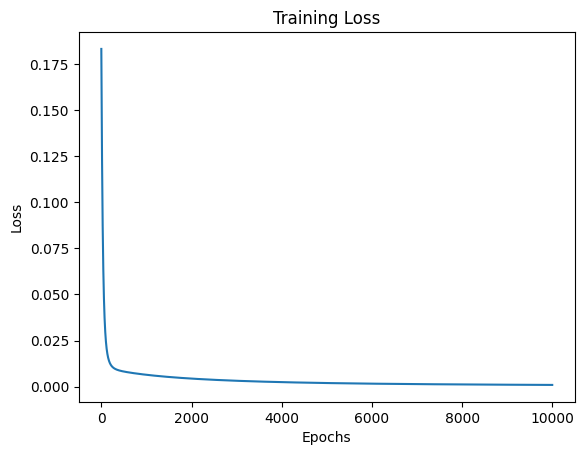

In [6]:
# Plotting the loss
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [7]:
# Print final weights
print("Final V:")
print(V)
print("Final W:")
print(W)

Final V:
[[-1.64904396 -0.49409849]
 [-2.17861999 -0.96865858]]
Final W:
[[-2.68753435]
 [-0.95837628]]
